## Frequency leakage

### Leakage

#### Recall that $f_0(m) = \frac{mf_s}{N}$, where $m = 0, 1, 2, ... , N-1$

#### DFT ----> When the input data sequence contains energy at $f_0$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from scipy.fftpack import fft
from scipy.fftpack import ifft
from scipy.fftpack import fftshift


#### Let us plot exactly 3 cycles with a total of 64 samples

In [3]:
fs = 64
ts = 1/fs
f0_1 = 3
f0_2 = 4
f0_3 = 5
f0_4 = 6
total_time = 1
N = np.arange(64)
x_1 = np.sin(2*np.pi*f0_1*N*ts)
x_2 = np.sin(2*np.pi*f0_2*N*ts)
x_3 = np.sin(2*np.pi*f0_3*N*ts)
x_4 = np.sin(2*np.pi*f0_3*N*ts)

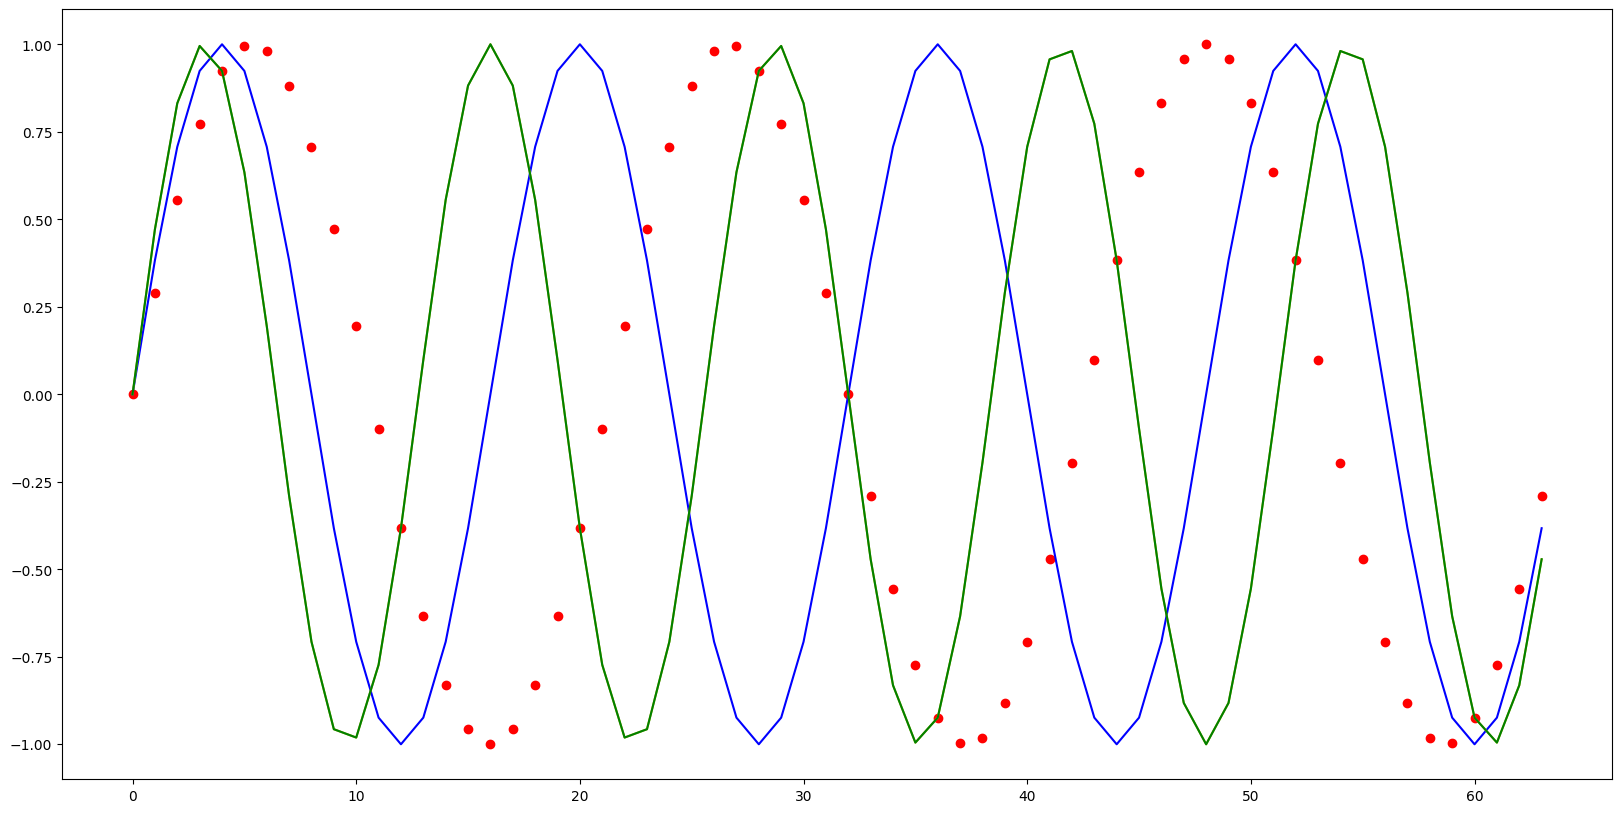

In [4]:
f1, ax1 = plt.subplots(figsize=(20, 10))
ax1.plot(N, x_1, 'ro')
ax1.plot(N, x_2, 'b')
ax1.plot(N, x_3, 'y')
ax1.plot(N, x_4, 'g')
plt.show()

#### What is the correlation of a signal with itself?

In [5]:
(x_1*x_1).sum() #A N/2

32.0

In [6]:
print((x_1*x_2).sum())
print((x_1*x_3).sum())
print((x_1*x_4).sum())

-3.5973586432070525e-15
-1.7763568394002505e-15
-1.7763568394002505e-15


#### The plot above shows that the analytical frequencies, i.e. the possible frequency 
#### components always have an integer number of cycles over the total  64 samples.
#### and the sum of products of inpt sequence and the m = 4 frequencies is zero, i.e. 
#### their correlation is zero

#### Lets us analyse the frequency components

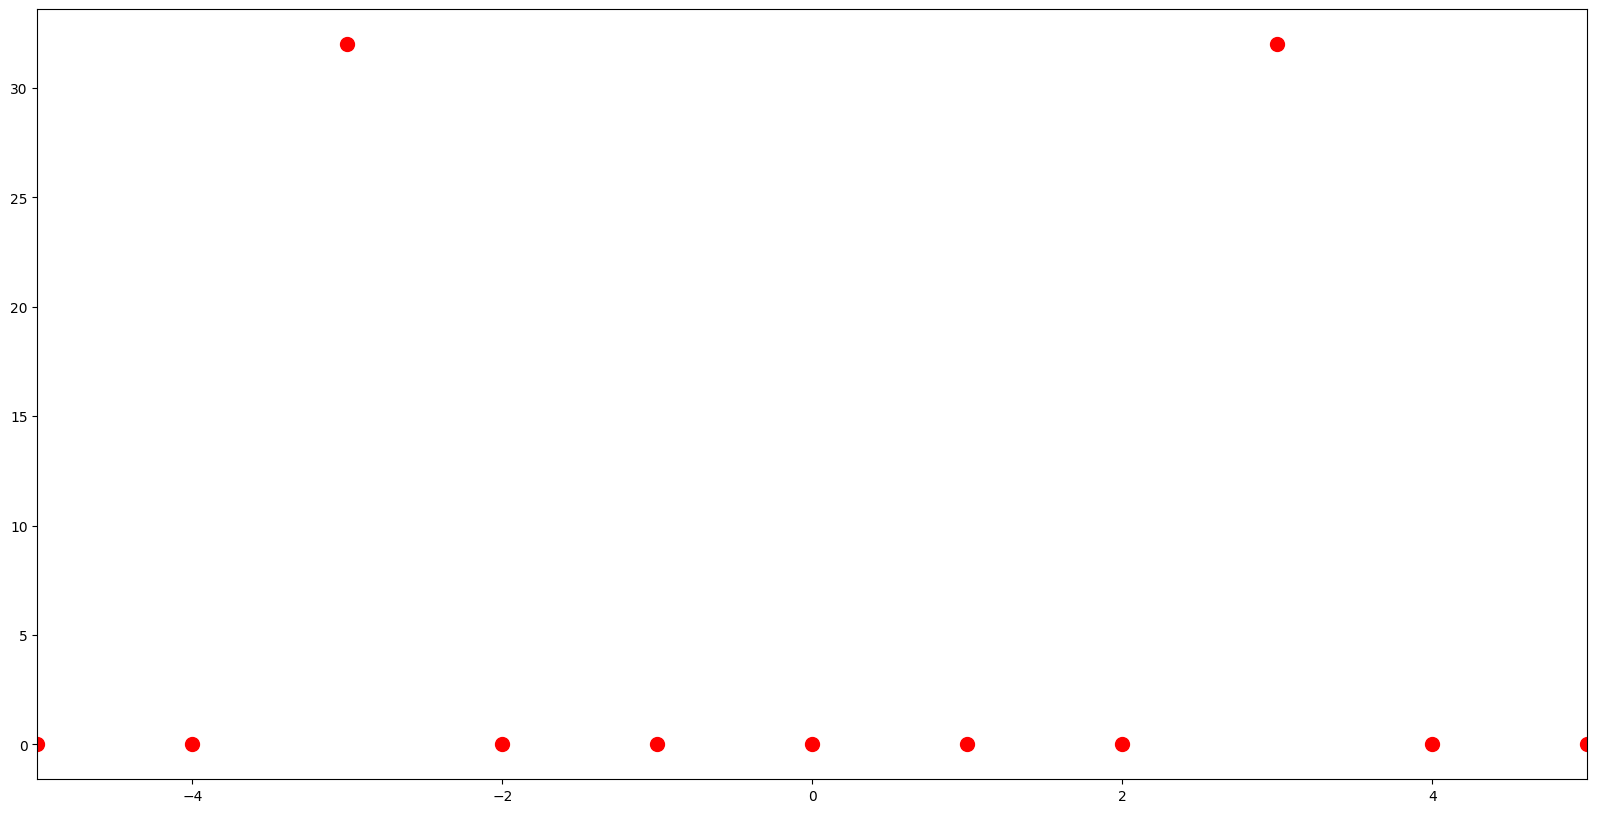

In [7]:
X = fft(x_1)
f2, ax2 = subplots(figsize=(20,10))
ax2.plot(np.arange(-len(X)/2,len(X)/2), fftshift(abs(X)), 'ro', markersize=10)
ax2.set_xlim(-5, 5)
plt.show()

### What if we don't have an integer number of cycles

In [8]:
fs = 64
ts = 1/fs
# f0_1 = 3
f0_1 = 3.4
f0_2 = 4
f0_3 = 5
f0_4 = 6
total_time = 1
N = np.arange(64)
x_1 = np.sin(2*np.pi*f0_1*N*ts)
x_2 = np.sin(2*np.pi*f0_2*N*ts)
x_3 = np.sin(2*np.pi*f0_3*N*ts)
x_4 = np.sin(2*np.pi*f0_4*N*ts)

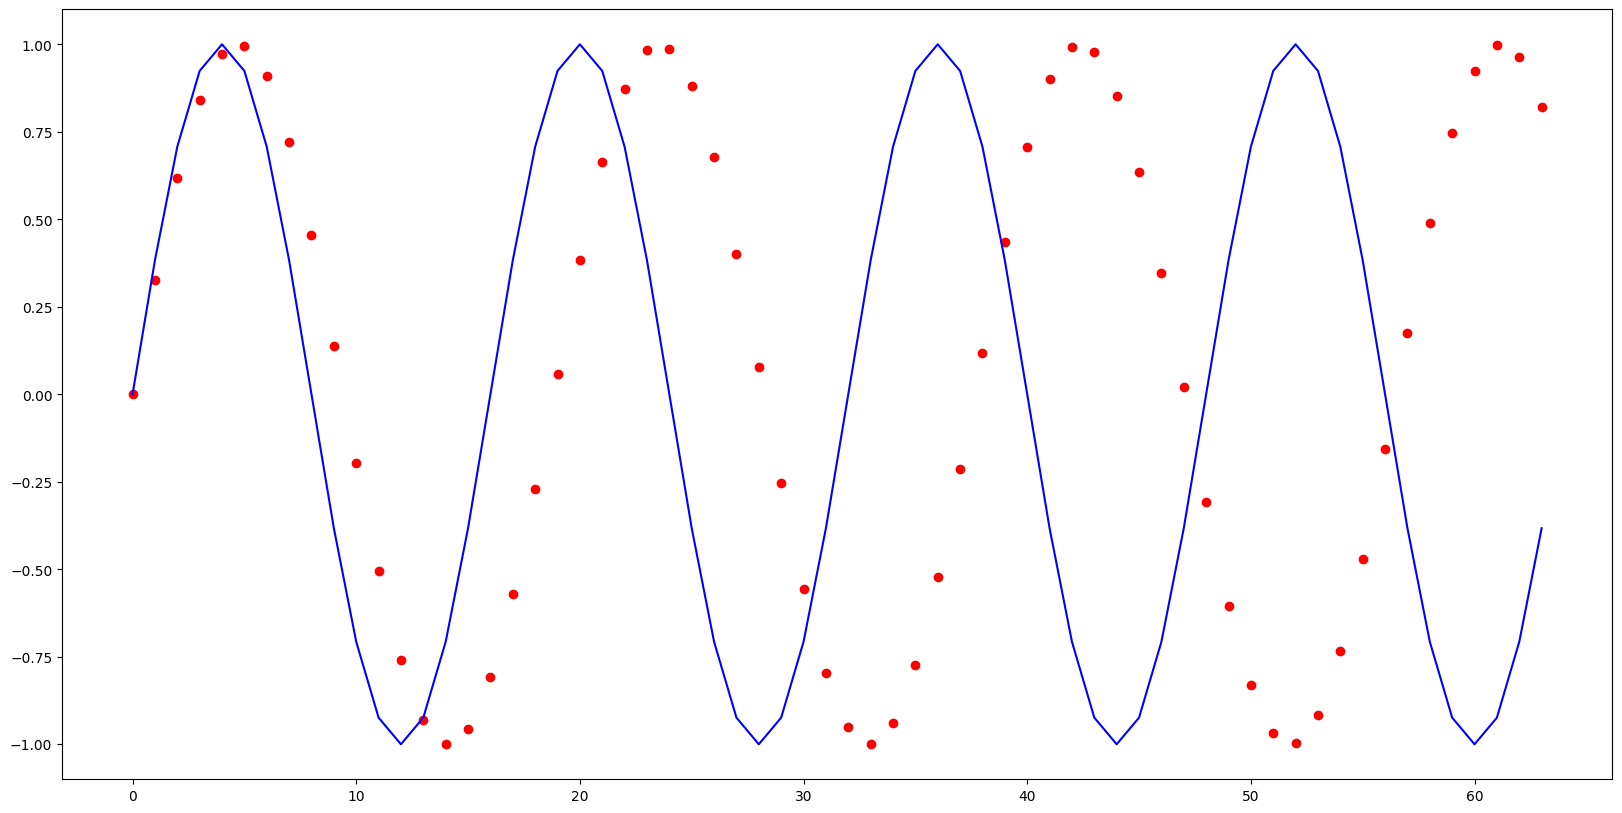

In [9]:
f3, ax3 = subplots(figsize=(20,10))
ax3.plot(N, x_1, 'ro')
ax3.plot(N, x_2, 'b')
# ax3.plot(N, x_3, 'w')
# ax3.plot(N, x_4, 'g')
plt.show()

#### Now let's calculate the FFT

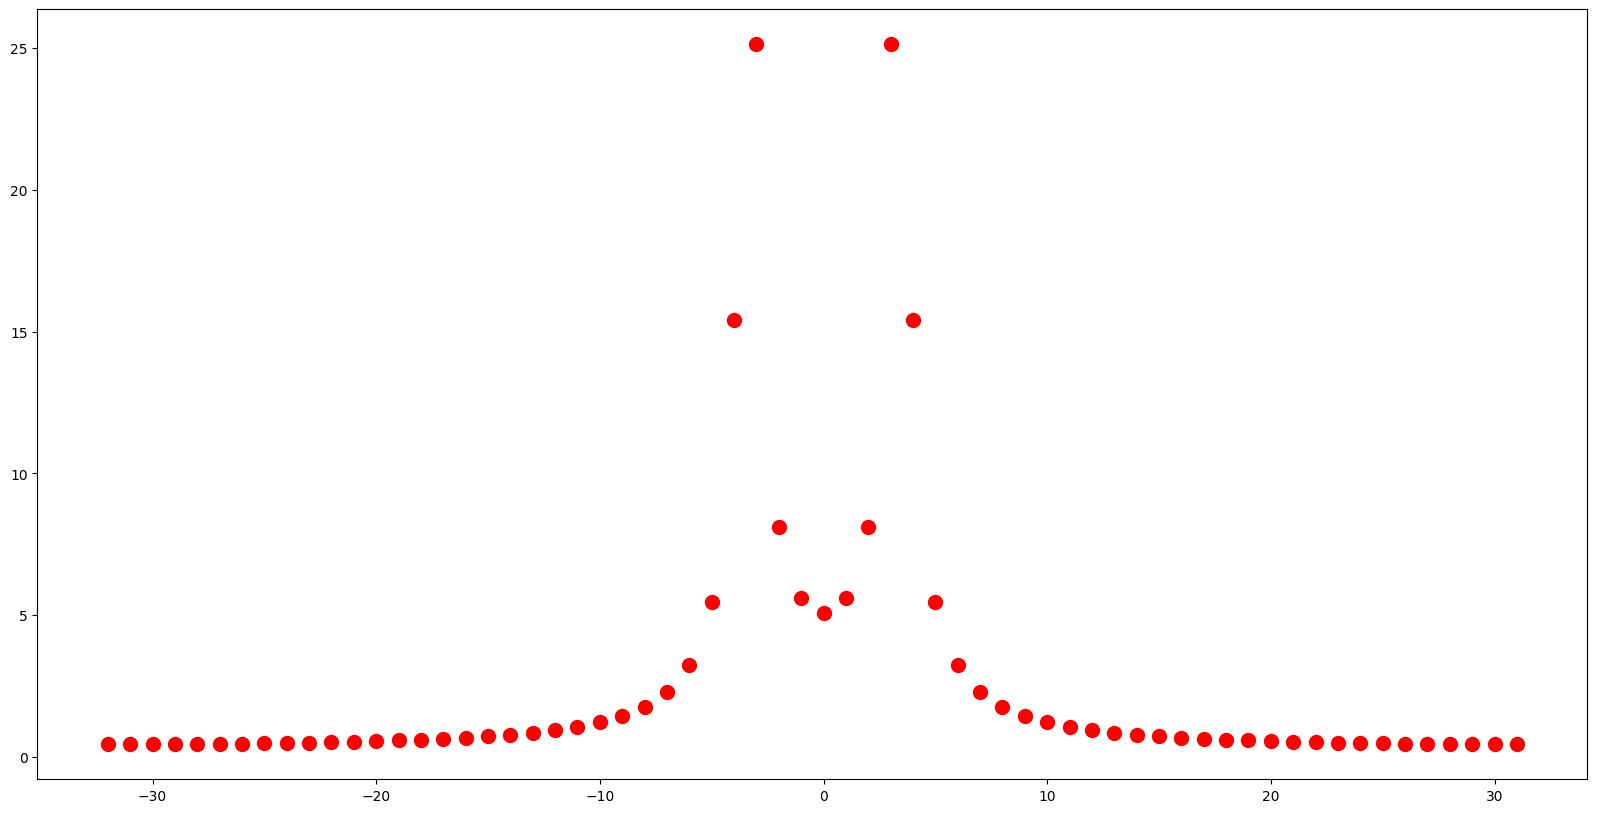

In [10]:
X = fft(x_1)
f4, ax4 = subplots(figsize=(20, 10))
ax4.plot(np.arange(-len(X)/2,len(X)/2), fftshift(abs(X)), 'ro', markersize=10)
# ax4.set_xlim(-10, 10)
# ax4.set_xlim(0, 32)
plt.show()

#### Since the input sequence does not have an integer number of cycles over the 64 samples
#### input energy leaks into all the other DFT frequency components.
#### This is because the sum of products of the input sequence and the e.g. m=4 frequency component
#### is no longer zero
#### This phenomenon is known as leakage, when any input signal whose freq. is not exactly at a DFT analysis frequency (bin)
#### to 'leak' into all the other DFT output bins.

In [11]:
print((x_1*x_2).sum())

-5.374418269526543


#### A DFT output is a sampled version of the continuous spectral curve of a Sinc function

In [12]:
fs = 64
ts = 1/fs
f0_1 = 3
total_time = 1
N = np.arange(64)
x_1 = np.sin(2*np.pi*f0_1*N*ts)
X_1 = fft(x_1)

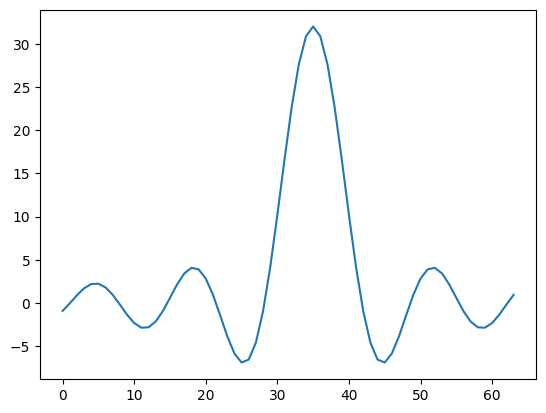

In [13]:
N = np.arange(-32, 32)
# x_sinc = 32*np.sin(np.pi*f0_1*N)/(np.pi*f0_1*N)
x_sinc = 32*np.sinc(np.pi*f0_1*(3-N)*ts)
X_sinc = fft(x_sinc)
# Just to make it coincide
# x_sinc_aux = np.zeros(67)
# x_sinc_aux[3:67] = x_sinc
##########
plt.plot(x_sinc)
plt.show()

In [14]:
x_sinc.shape

(64,)

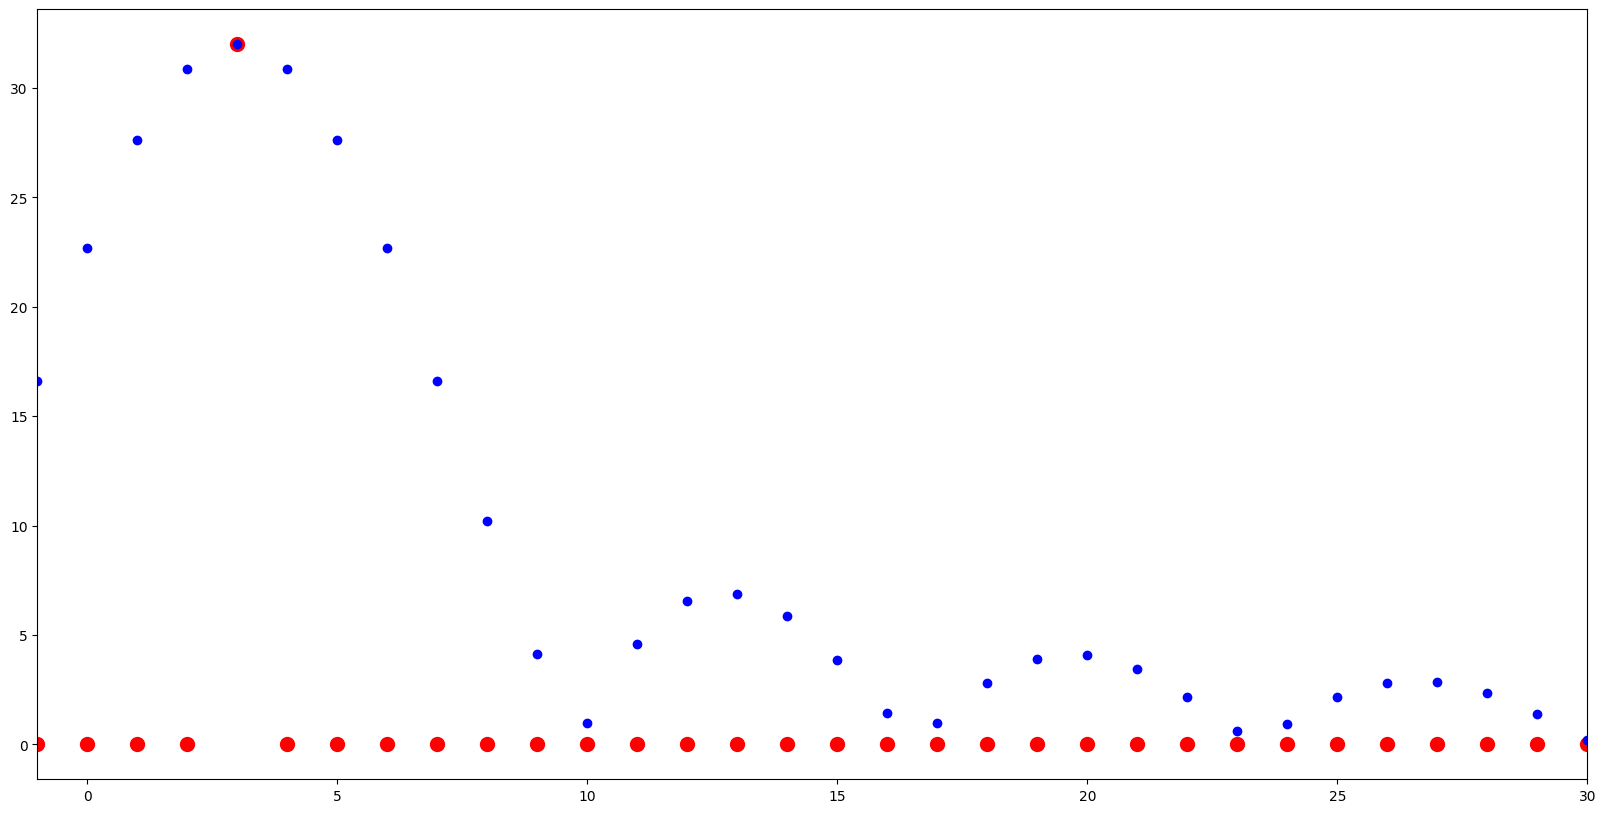

In [15]:
f5, ax5 = subplots(figsize=(20, 10))
# ax3.plot(np.arange(-len(Xm)/2, len(Xm)/2), np.abs(fftshift(Xm)))
ax5.plot(np.arange(-len(X)/2,len(X)/2), fftshift(abs(X_1)), 'ro', markersize=10)
ax5.plot(np.arange(-len(X)/2,len(X)/2), (abs(x_sinc)), 'bo')
# ax5.plot(np.arange(-len(X)/2,len(X)/2), fftshift(abs(x_sinc_aux[:64])), 'bo')
ax5.set_xlim([-1, 30])
plt.show()

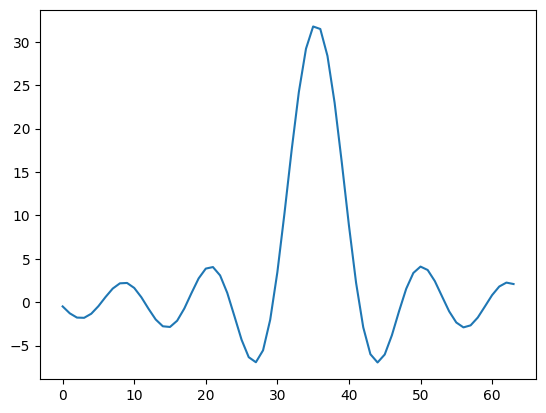

In [16]:
fs = 64
ts = 1/fs
f0_1 = 3.4
total_time = 1
N = np.arange(64)
x_2 = np.sin(2*np.pi*f0_1*N*ts)
X_2 = fft(x_2)

N = np.arange(-32, 32)
# x_sinc = 32*np.sin(np.pi*f0_1*N)/(np.pi*f0_1*N)
x_sinc = 32*np.sinc(np.pi*f0_1*(3.4-N)*ts)
# X_sinc = fft(x_sinc)
# Just to make it coincide
x_sinc_aux = np.zeros(67)
x_sinc_aux[:64] = x_sinc
##########
plt.plot(x_sinc)
plt.show()

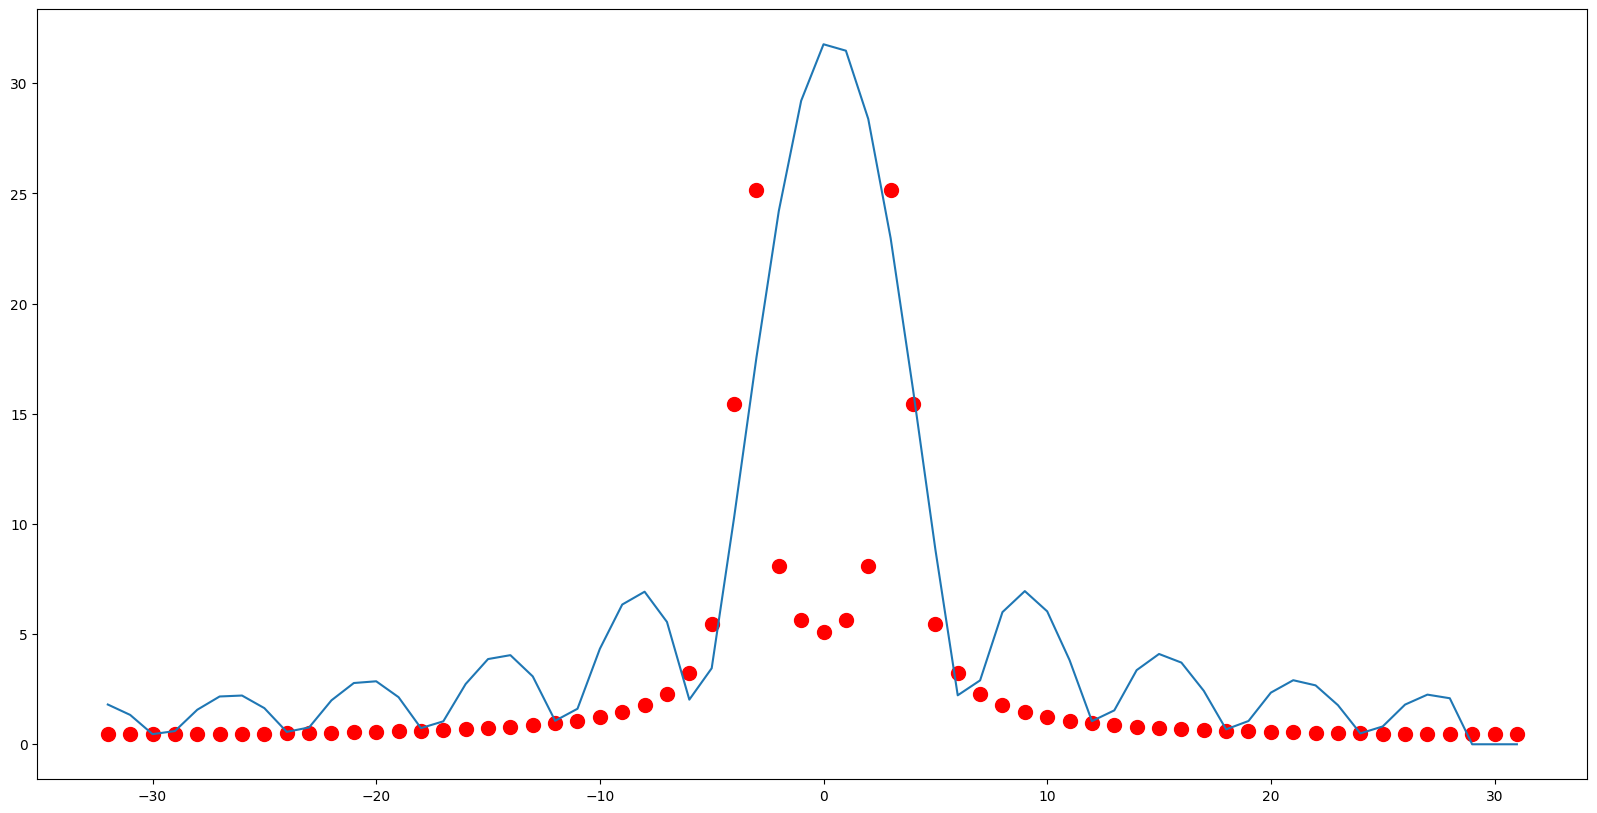

In [17]:
f6, ax6 = subplots(figsize=(20, 10))
# ax3.plot(np.arange(-len(Xm)/2, len(Xm)/2), np.abs(fftshift(Xm)))
ax6.plot(np.arange(-len(X)/2,len(X)/2), fftshift(abs(X_2)), 'ro', markersize=10)
ax6.plot(np.arange(-len(X)/2,len(X)/2), (abs(x_sinc_aux[3:67])))
# ax6.set_xlim([-1, 30])
plt.show()